# Understanding Descriptive Statistics

Import the necessary libraries here:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [107]:
dataset = pd.DataFrame(np.random.randint(1,7,size=10))
dataset

,0
0,4
1,4
2,3
3,2
4,6
5,5
6,2
7,4
8,3
9,1


#### 2.- Plot the results sorted by value.

In [108]:
dataset.sort_values(by=0)

,0
9,1
3,2
6,2
2,3
8,3
0,4
1,4
7,4
5,5
4,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [109]:
freq = pd.DataFrame(dataset.value_counts(),columns=["absolut_freq"]).reset_index()
freq = freq.rename(columns={0 : "dice_value"})
freq

,dice_value,absolut_freq
0,4,3
1,2,2
2,3,2
3,1,1
4,5,1
5,6,1


In [110]:
# value_counts shows us the frequency that each value appears in the dataframe

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [111]:
def avg (list):
    return sum(list)/len(list)

avg(dataset[0])

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [112]:
sum(freq["dice_value"]*freq["absolut_freq"])/sum(freq["absolut_freq"])

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [113]:
def median (list):
    result = (np.sort(list)[int((len(list)/2))-1] + np.sort(list)[int((len(list)/2))]) /2
    return result

median(dataset)

array([5.5])

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [114]:
# DO NOT DO THIS ONE

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [115]:
dice_hundred = pd.read_csv(r"..\data\roll_the_dice_hundred.csv")
dice_hundred.drop("Unnamed: 0", axis=1, inplace=True)
dice_hundred.sort_values(by="value")

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [116]:
avg(dice_hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [117]:
dice_hundred.drop("roll", axis=1, inplace=True)
freq = pd.DataFrame(dice_hundred.value_counts(),columns=["absolut_freq"]).reset_index()
freq

,value,absolut_freq
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:ylabel='Frequency'>

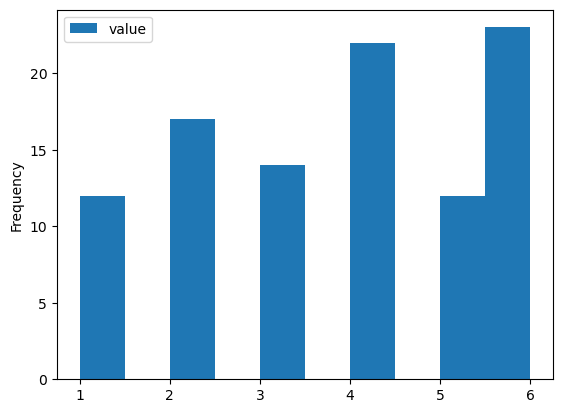

In [118]:
dice_hundred.plot.hist(column=["value"])

In [119]:
# 4 and 6 were the values that most rolled on the dice, the average is 3.74 - a little higher than the median (3.50) 
# wich makes sense since the higher numbers were more frequent

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [120]:
dice_thousand = pd.read_csv(r"..\data\roll_the_dice_thousand.csv")
dice_thousand.drop("Unnamed: 0", axis=1, inplace=True)
dice_thousand.sort_values(by="value")

,roll,value
564,564,1
922,922,1
560,560,1
213,213,1
214,214,1
...,...,...
855,855,6
360,360,6
857,857,6
388,388,6


In [121]:
dice_thousand.drop("roll", axis=1, inplace=True)
freq = pd.DataFrame(dice_thousand.value_counts(),columns=["absolut_freq"]).reset_index()
freq

,value,absolut_freq
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


<AxesSubplot:ylabel='Frequency'>

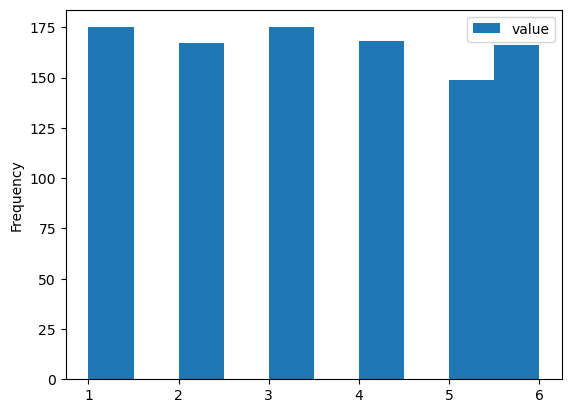

In [122]:
dice_thousand.plot.hist(column=["value"])

In [123]:
# with the numbers of rolls getting higher, the frequenci distribution is more balanced through out all values, wich makes sense
# since every number on a dice has the same probability of occuring 
# my guess is the average will be closer to the median and the standard deviation will be smaller here than in the thousand, let's check

avg(dice_thousand["value"])


3.447

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:ylabel='Frequency'>

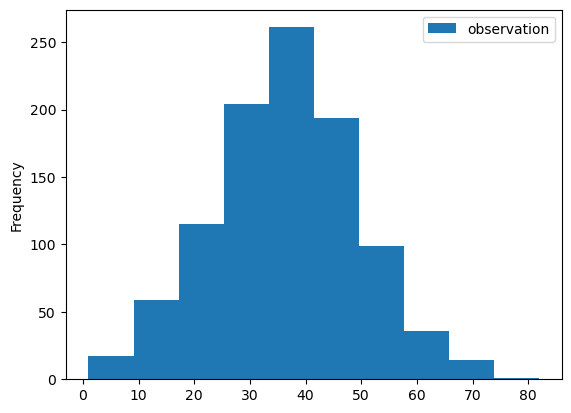

In [124]:
ages_population = pd.read_csv(r"..\data\ages_population.csv")
ages_population.plot.hist(column=["observation"])

In [125]:
# looking at the plot, looks like the mean will be between 30 & 40. the standard deviation will be around 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [126]:
print(np.mean(ages_population["observation"]),np.std(ages_population["observation"]))

36.56 12.81008977329979


In [127]:
# it's about what i thought

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

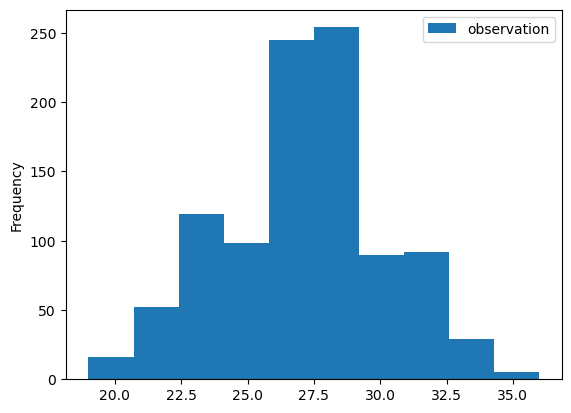

In [128]:
ages_population2 = pd.read_csv(r"..\data\ages_population2.csv")
ages_population2.plot.hist(column=["observation"])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [129]:
# yes, it is diferent, the values are not as uniformly distributed as the previous one

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [130]:
print(np.mean(ages_population2["observation"]),np.std(ages_population2["observation"]))

27.155 2.9683286543103704


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

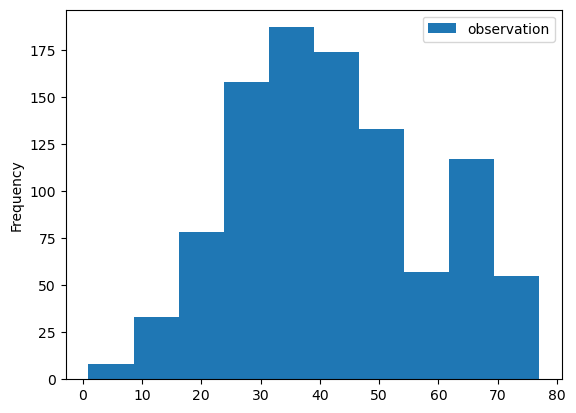

In [131]:
ages_population3 = pd.read_csv(r"..\data\ages_population3.csv")
ages_population3.plot.hist(column=["observation"])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [132]:
print(np.mean(ages_population3["observation"]),np.std(ages_population3["observation"]))

41.989 16.136631587788084


In [133]:
# the mean is being pulled to the right, since higher ages are more frequent, the std deviation is bigger because we have a higher range of ages

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

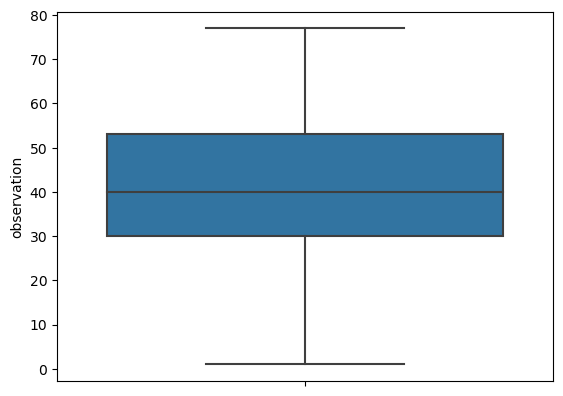

In [134]:
sns.boxplot(y="observation", data=ages_population3)
plt.show()

In [135]:
# there's 25% of the population between 0 and 30 years old
# there's 25% of the population between 30 and 40 years old
# there's 25% of the population between 40 and around 55 years old
# there's 25% of the population older than around 55 years old

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.